In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import requests
from datetime import date, timedelta
import seaborn as sns
import datetime 

In [15]:
dfpm25 = pd.read_csv('hourly/pm25_hourly_2019.csv', parse_dates=[['Date Local', 'Time Local']])
dfpm25['Date Local_Time Local'] = pd.to_datetime(dfpm25['Date Local_Time Local'])

In [19]:
dfpm10 = pd.read_csv('hourly/pm10_hourly_2019.csv', parse_dates=[['Date Local', 'Time Local']])
dfpm10['Date Local_Time Local'] = pd.to_datetime(dfpm10['Date Local_Time Local'])

/home/abhishek/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
dfpm25['County Name'].unique()

array(['Jefferson', 'Russell', 'Anchorage ', 'Juneau ',
       'Matanuska-Susitna ', 'Cochise', 'La Paz', 'Maricopa', 'Pima',
       'Pinal', 'Santa Cruz', 'Yuma', 'Alameda', 'Butte', 'Calaveras',
       'Colusa', 'Contra Costa', 'Fresno', 'Inyo', 'Kern', 'Kings',
       'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Merced', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Placer', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus',
       'Tehama', 'Ventura', 'Adams', 'Boulder', 'Delta', 'Denver',
       'Douglas', 'El Paso', 'Garfield', 'La Plata', 'Larimer', 'Mesa',
       'Rio Blanco', 'Weld', 'Fairfield', 'Hartford', 'Litchfield',
       'New Haven', 'New London', 'Kent', 'New Castle', 'Sussex',
       'District of Columbia', 'Alachua', 'Brevard', 'Broward', 'Duval',
       'Escambia', 'Hillsborough', 

### PM 2.5

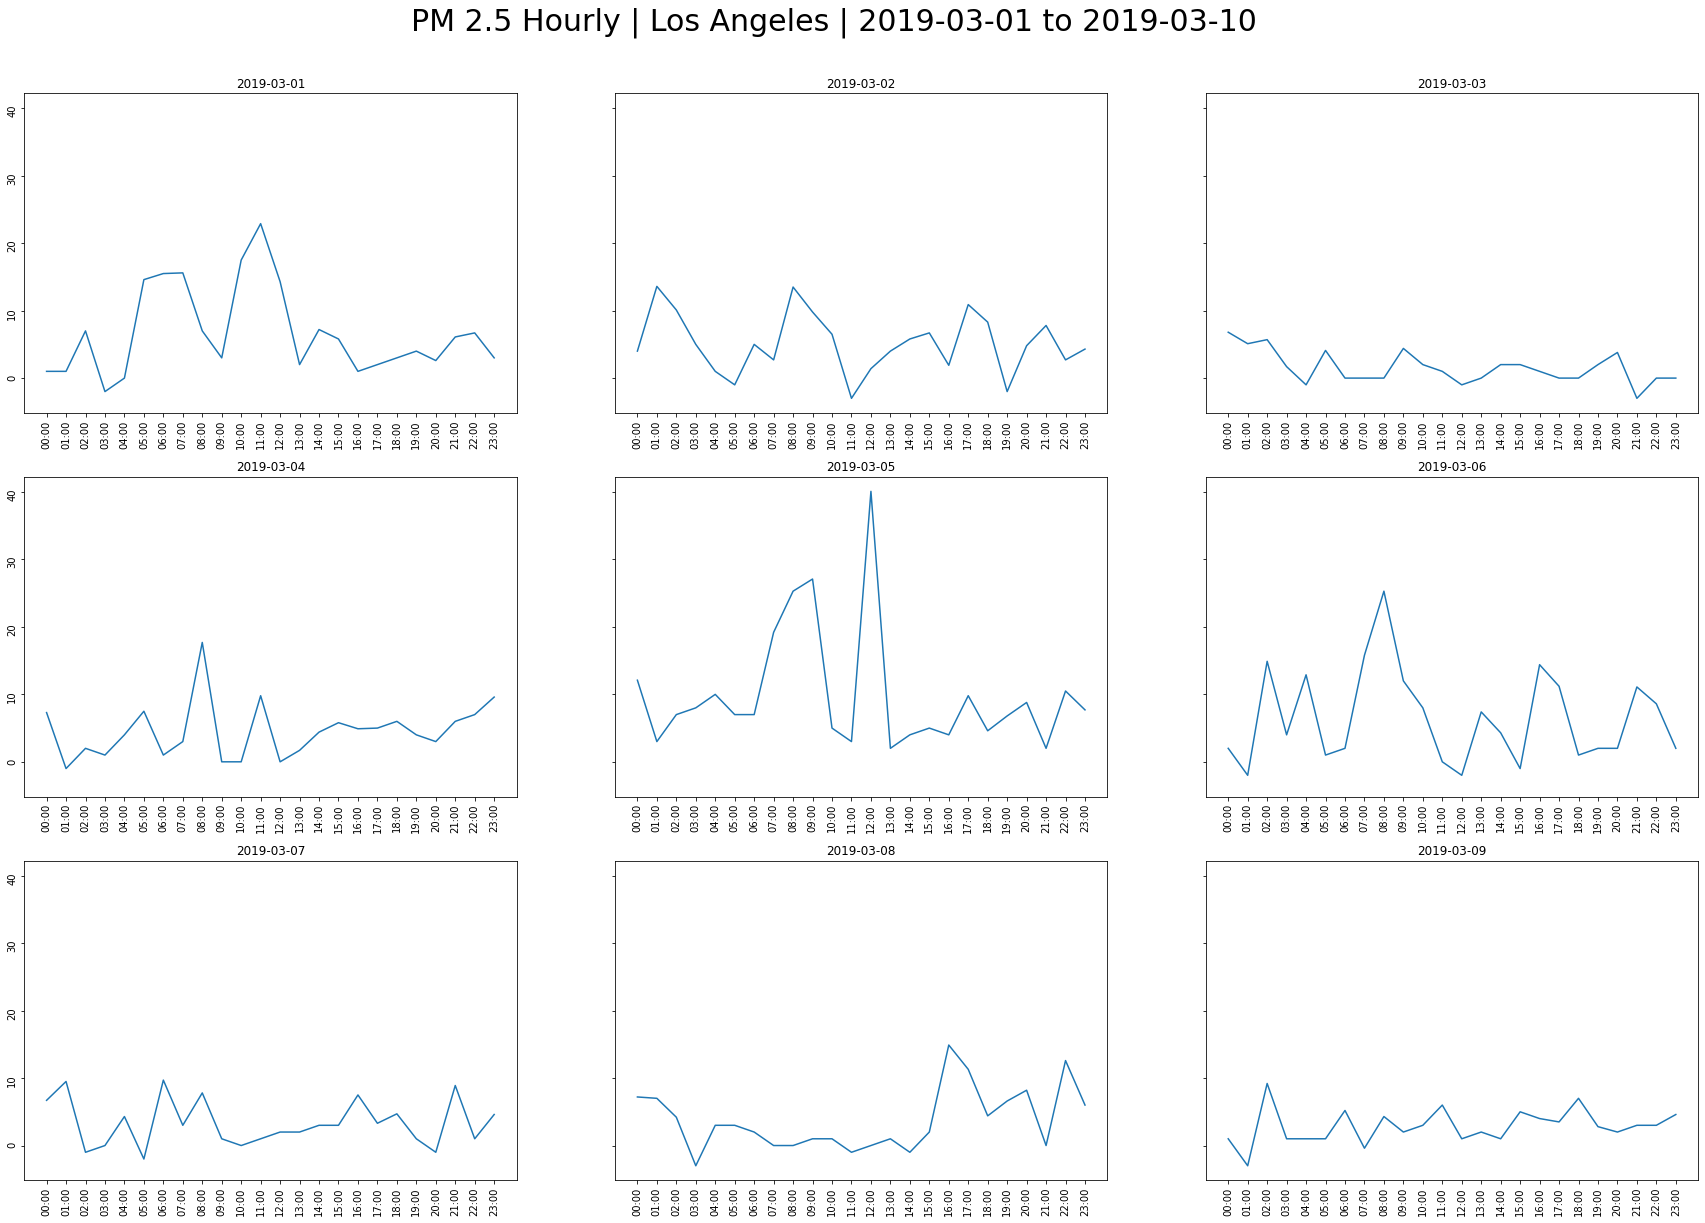

In [18]:
x = 'Los Angeles' #County Name
sdate = date(2019,3,1) # start date
edate = date(2019,3,10) # end date

df_pm25 = dfpm25.loc[dfpm25['County Name'] == f'{x}'] 
df_pm25 = df_pm25.sort_values('Date Local_Time Local').drop_duplicates('Date Local_Time Local',keep='last')

time = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
       '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00']
dates = pd.date_range(sdate,edate,freq='d')

fig1, axs1 = plt.subplots(3, 3, sharey=True,figsize=(30,20))

for ax in fig1.axes:
    ax.tick_params(labelrotation=90)

axs1[0, 0].plot(time, df_pm25.loc[(df_pm25['Date Local_Time Local'] >= dates[0]) & (df_pm25['Date Local_Time Local'] < dates[1]), ['Sample Measurement']])
axs1[0, 0].set_title(f'{dates[0].date()}')
axs1[0, 1].plot(time, df_pm25.loc[(df_pm25['Date Local_Time Local'] >= dates[1]) & (df_pm25['Date Local_Time Local'] < dates[2]), ['Sample Measurement']])
axs1[0, 1].set_title(f'{dates[1].date()}')
axs1[0, 2].plot(time, df_pm25.loc[(df_pm25['Date Local_Time Local'] >= dates[2]) & (df_pm25['Date Local_Time Local'] < dates[3]), ['Sample Measurement']])
axs1[0, 2].set_title(f'{dates[2].date()}')

axs1[1, 0].plot(time, df_pm25.loc[(df_pm25['Date Local_Time Local'] >= dates[3]) & (df_pm25['Date Local_Time Local'] < dates[4]), ['Sample Measurement']])
axs1[1, 0].set_title(f'{dates[3].date()}')
axs1[1, 1].plot(time, df_pm25.loc[(df_pm25['Date Local_Time Local'] >= dates[4]) & (df_pm25['Date Local_Time Local'] < dates[5]), ['Sample Measurement']])
axs1[1, 1].set_title(f'{dates[4].date()}')
axs1[1, 2].plot(time, df_pm25.loc[(df_pm25['Date Local_Time Local'] >= dates[5]) & (df_pm25['Date Local_Time Local'] < dates[6]), ['Sample Measurement']])
axs1[1, 2].set_title(f'{dates[5].date()}')

axs1[2, 0].plot(time, df_pm25.loc[(df_pm25['Date Local_Time Local'] >= dates[6]) & (df_pm25['Date Local_Time Local'] < dates[7]), ['Sample Measurement']])
axs1[2, 0].set_title(f'{dates[6].date()}')
axs1[2, 1].plot(time, df_pm25.loc[(df_pm25['Date Local_Time Local'] >= dates[7]) & (df_pm25['Date Local_Time Local'] < dates[8]), ['Sample Measurement']])
axs1[2, 1].set_title(f'{dates[7].date()}')
axs1[2, 2].plot(time, df_pm25.loc[(df_pm25['Date Local_Time Local'] >= dates[8]) & (df_pm25['Date Local_Time Local'] < dates[9]), ['Sample Measurement']])
axs1[2, 2].set_title(f'{dates[8].date()}')

fig1.suptitle(f'PM 2.5 Hourly | {x} | {sdate} to {edate}', size =30, y=0.94) 

plt.savefig(f'{x}_hourly_PM25.png', bbox_inches='tight')

### PM 10

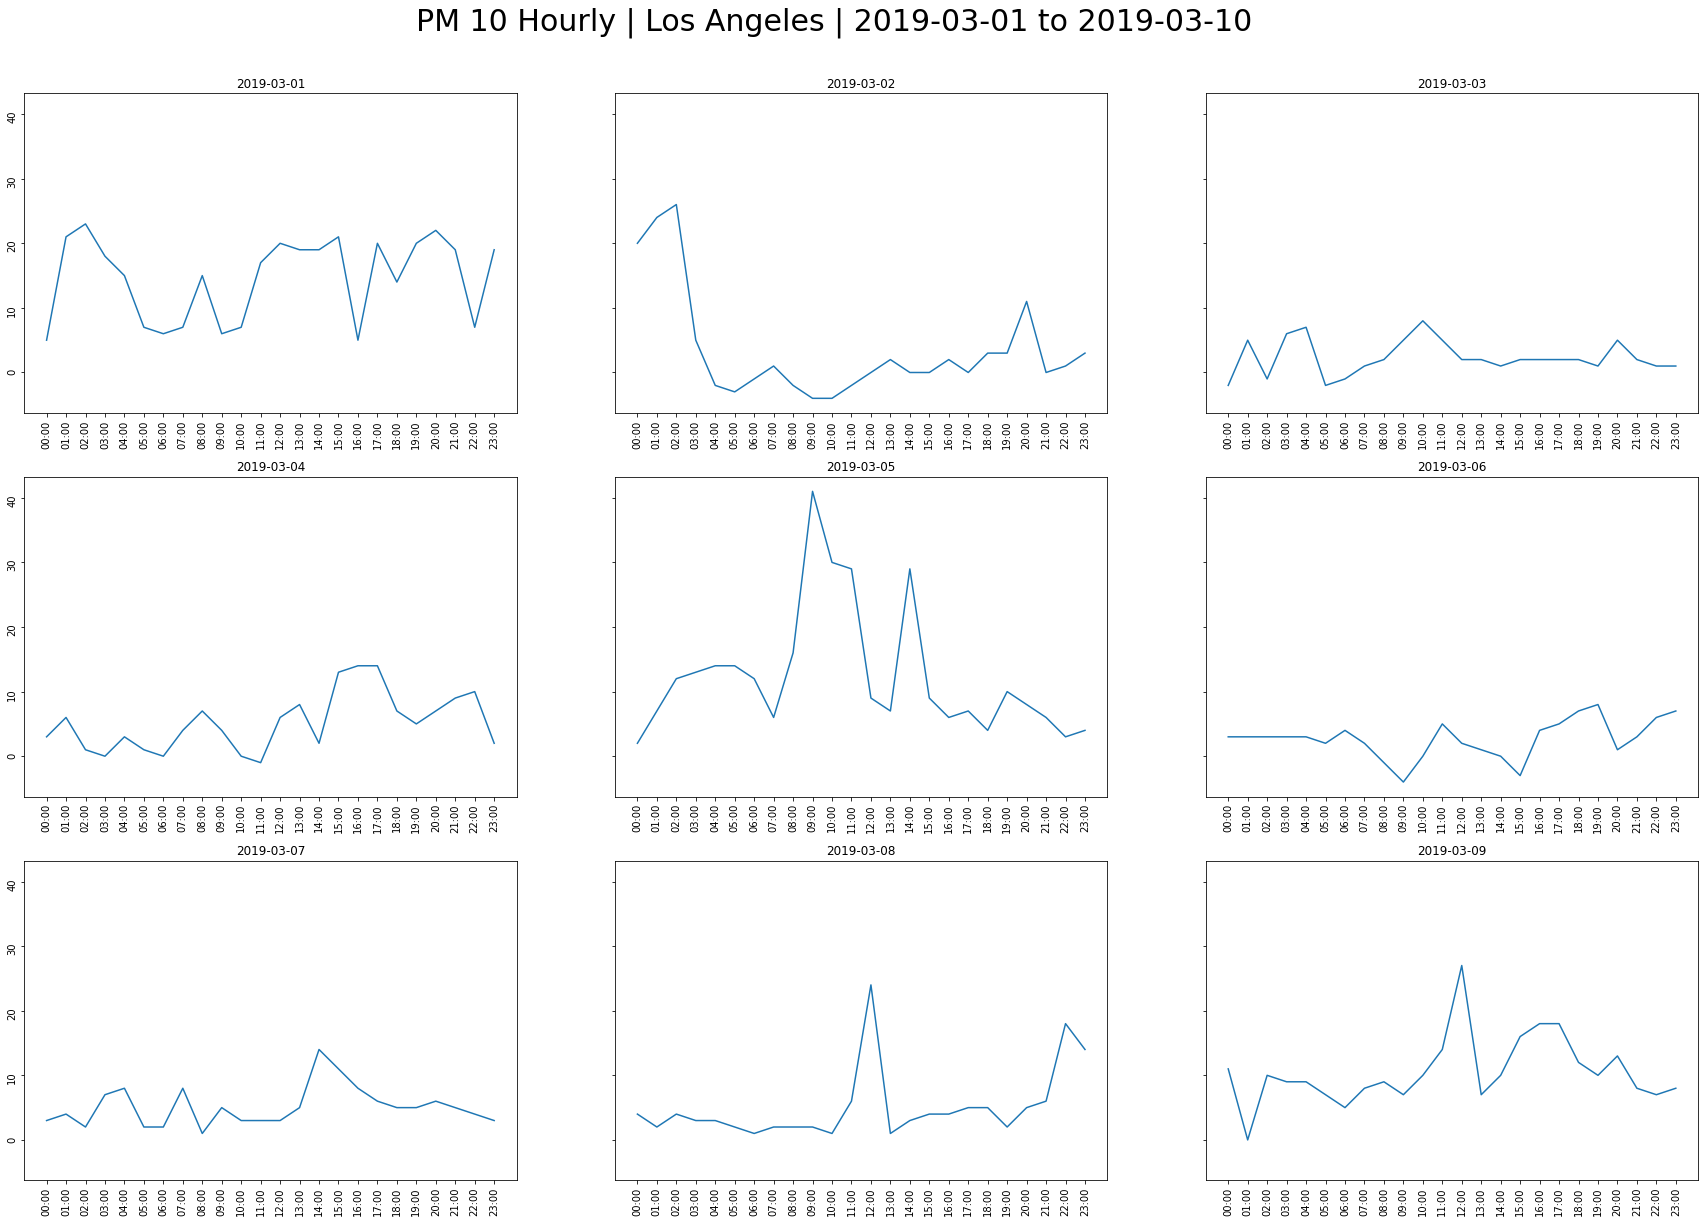

In [20]:
df_pm10 = dfpm10.loc[dfpm10['County Name'] == f'{x}'] 
df_pm10 = df_pm10.sort_values('Date Local_Time Local').drop_duplicates('Date Local_Time Local',keep='last')

time = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
       '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00']
dates = pd.date_range(sdate,edate,freq='d')

fig1, axs1 = plt.subplots(3, 3, sharey=True,figsize=(30,20))

for ax in fig1.axes:
    ax.tick_params(labelrotation=90)

axs1[0, 0].plot(time, df_pm10.loc[(df_pm10['Date Local_Time Local'] >= dates[0]) & (df_pm10['Date Local_Time Local'] < dates[1]), ['Sample Measurement']])
axs1[0, 0].set_title(f'{dates[0].date()}')
axs1[0, 1].plot(time, df_pm10.loc[(df_pm10['Date Local_Time Local'] >= dates[1]) & (df_pm10['Date Local_Time Local'] < dates[2]), ['Sample Measurement']])
axs1[0, 1].set_title(f'{dates[1].date()}')
axs1[0, 2].plot(time, df_pm10.loc[(df_pm10['Date Local_Time Local'] >= dates[2]) & (df_pm10['Date Local_Time Local'] < dates[3]), ['Sample Measurement']])
axs1[0, 2].set_title(f'{dates[2].date()}')

axs1[1, 0].plot(time, df_pm10.loc[(df_pm10['Date Local_Time Local'] >= dates[3]) & (df_pm10['Date Local_Time Local'] < dates[4]), ['Sample Measurement']])
axs1[1, 0].set_title(f'{dates[3].date()}')
axs1[1, 1].plot(time, df_pm10.loc[(df_pm10['Date Local_Time Local'] >= dates[4]) & (df_pm10['Date Local_Time Local'] < dates[5]), ['Sample Measurement']])
axs1[1, 1].set_title(f'{dates[4].date()}')
axs1[1, 2].plot(time, df_pm10.loc[(df_pm10['Date Local_Time Local'] >= dates[5]) & (df_pm10['Date Local_Time Local'] < dates[6]), ['Sample Measurement']])
axs1[1, 2].set_title(f'{dates[5].date()}')

axs1[2, 0].plot(time, df_pm10.loc[(df_pm10['Date Local_Time Local'] >= dates[6]) & (df_pm10['Date Local_Time Local'] < dates[7]), ['Sample Measurement']])
axs1[2, 0].set_title(f'{dates[6].date()}')
axs1[2, 1].plot(time, df_pm10.loc[(df_pm10['Date Local_Time Local'] >= dates[7]) & (df_pm10['Date Local_Time Local'] < dates[8]), ['Sample Measurement']])
axs1[2, 1].set_title(f'{dates[7].date()}')
axs1[2, 2].plot(time, df_pm10.loc[(df_pm10['Date Local_Time Local'] >= dates[8]) & (df_pm10['Date Local_Time Local'] < dates[9]), ['Sample Measurement']])
axs1[2, 2].set_title(f'{dates[8].date()}')

fig1.suptitle(f'PM 10 Hourly | {x} | {sdate} to {edate}', size =30, y=0.94) 

plt.savefig(f'{x}_hourly_PM10.png', bbox_inches='tight')